In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Item II

Let $H_n$ be the $n\times n$ Hilbert matrix whose $ij$-th entry is defined as $1/(i+j-1)$, also, let $\mathbf{1}_n$ be the vector of ones of dimension $n$. *Discuss the following questions.*
1. Find, as accurate as possible, the approximate solution $\hat{\mathbf{x}}$ of the linear system $A\mathbf{x}=\mathbf{b}$, where $A=H_n$ and $\mathbf{b}= H_n\mathbf{1}_n$ for $n=3\dots 20$. Notice that we know a priori that the exact solution is just $\mathbf{x} = \mathbf{1}_n$, but (un)fortunately the computer can only give you $\tilde{\mathbf{x}}$.
2. What is the relation between $\mathbf{x}$ and $\tilde{\mathbf{x}}$?
3. What can we do now?

---

In [2]:
def hilbert(n):
    v = np.arange(1,n+1,dtype='float')
    iis = v.reshape((1,n))
    jjs = v.reshape((n,1))
    return (iis+jjs-1)**-1

In [3]:
NS = np.arange(3,20+1)
errors = []

for n in NS:
    H = hilbert(n)
    real_x = np.ones(n)
    b = np.dot(H,real_x)
    x = np.linalg.solve(H,b)# We use np.linalg.solve
    err = np.mean(np.abs((x-real_x)/real_x))
    errors.append(err)
    
errors = np.array(errors)

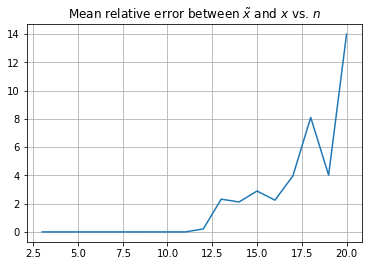

In [4]:
# Plot errors
plt.plot(NS,errors)
plt.grid()
plt.title("Mean relative error between $\\tilde{x}$ and $x$ vs. $n$")
plt.plot()
pass

We see that as $n$ grows, the relative error between $\tilde{\mathbf{x}}$ and $\mathbf{x}$ grows fast.

This is because $\text{cond}(H_n) = O\left( \left(1+\sqrt{2}\right)^{4n}/\sqrt{n}\right)$, so, given small perturbations on the operations required to solve the problem, the error on the solution grows considerably with $n$.

---

To solve the problem we can try to minimize instead of finding the exact solution

In [5]:
lstsq_errors = []

for n in NS:
    H = hilbert(n)
    real_x = np.ones(n)
    b = np.dot(H,real_x)
    x,_,_,_ = np.linalg.lstsq(H,b,rcond=None)
    err = np.mean(np.abs((x-real_x)/real_x))
    lstsq_errors.append(err)

lstsq_errors = np.array(lstsq_errors)

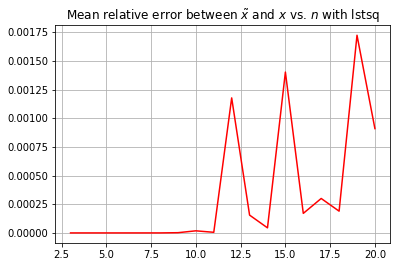

In [8]:
# Plot errors
plt.plot(NS,lstsq_errors,c="#ff0000")
plt.grid()
plt.title("Mean relative error between $\\tilde{x}$ and $x$ vs. $n$ with lstsq")
plt.plot()
pass

We can see that approaching the problem like a minimization gives far better results, because it can perform more iterations to correct numerical errors.